In [1]:
import os
from astropy.table import Table
from astropy.stats import mad_std
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
out_dir = 'results_4thb/'

stamps_path = os.path.join(out_dir, 'postage_stamps.fits')
cat_real_path = os.path.join(out_dir, 'catalog_real.fits')
cat_mock_path = os.path.join(out_dir, 'catalog_mock.fits')
cat_param_path = os.path.join(out_dir, 'catalog_param.fits')

cat = Table.read(stamps_path)    
print("Done loading postage stamps")

m_real = Table.read(cat_real_path)
m_mock = Table.read(cat_mock_path)
m_param = Table.read(cat_param_path)
print("Done loading morphology statistics")

# Remove offensive objects
mask = m_real['flag'] & m_mock['flag'] & m_param['flag']
mask &= m_real['flag_morph'] & m_mock['flag_morph'] & m_param['flag_morph'] 
mask &= ~isnan(m_real['M20']) & ~isnan(m_mock['M20']) & ~isnan(m_param['M20'])
m = mask

Done loading postage stamps
Done loading morphology statistics


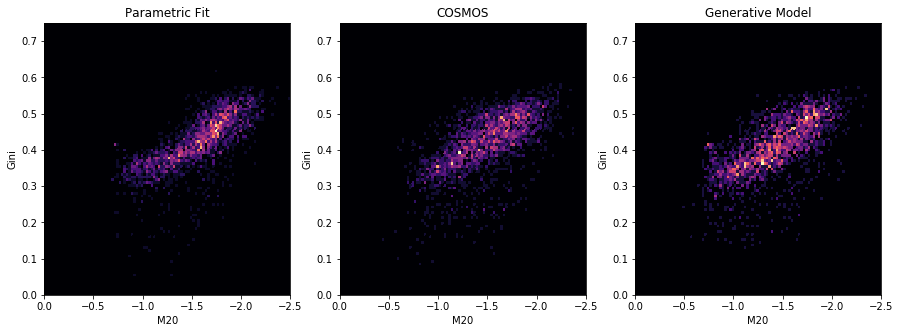

In [22]:
figure(figsize=(15,5))
subplot(131)
hist2d(m_param['M20'][m], m_param['Gini'][m],100,range=[[-2.5,0],[0,0.75]], cmap='magma');
xlim(0,-2.5)
ylabel('Gini')
xlabel('M20')
title('Parametric Fit')
subplot(132)
hist2d(m_real['M20'][m], m_real['Gini'][m],100,range=[[-2.5,0],[0,0.75]], cmap='magma');
xlim(0,-2.5)
xlabel('M20')
ylabel('Gini')
title('COSMOS')
subplot(133)
hist2d(m_mock['M20'][m], m_mock['Gini'][m],100,range=[[-2.5,0],[0,0.75]], cmap='magma');
xlim(0,-2.5)
xlabel('M20')
ylabel('Gini')
title('Generative Model')
savefig("Figures/Figure_gini_m20.pdf")

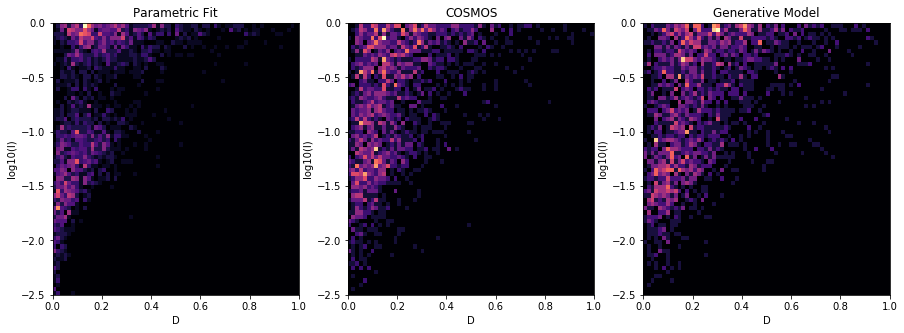

In [23]:
figure(figsize=(15,5))
subplot(131)
m = m_param['flag_morph'] & (m_param['I'] >0)
hist2d(m_param['D'][m], log10(m_param['I'][m]),64, range=[[0,1],[-2.5,0]], cmap='magma');
xlabel('D')
ylabel('log10(I)')
title('Parametric Fit')

subplot(132)
m = m_real['flag_morph'] & (m_real['I'] >0)
hist2d(m_real['D'][m], log10(m_real['I'][m]),64, range=[[0,1],[-2.5,0]], cmap='magma');
xlabel('D')
ylabel('log10(I)')
title('COSMOS')

subplot(133)
m = m_mock['flag_morph'] & (m_mock['I'] >0)
hist2d(m_mock['D'][m], log10(m_mock['I'][m]),64, range=[[0,1],[-2.5,0]], cmap='magma');
xlabel('D')
ylabel('log10(I)')
title('Generative Model')

savefig("Figures/Figure_ID.pdf")

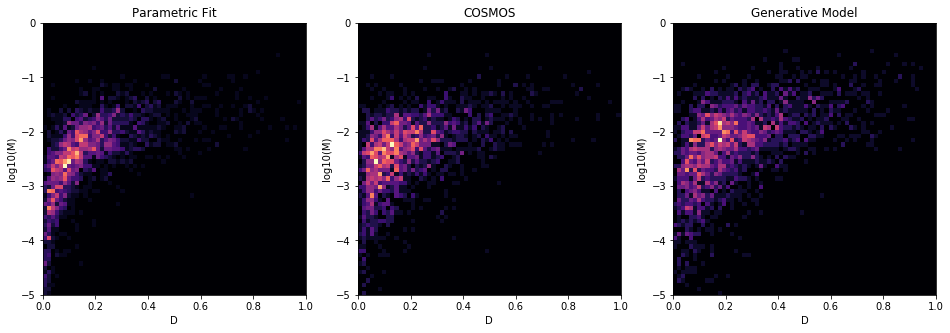

In [26]:
figure(figsize=(16,5))
subplot(131)
m = m_param['flag_morph'] & (m_param['I'] >0) & (m_param['M'] >0)
hist2d( (m_param['D'][m]),log10(m_param['M'][m]),64, range=[[0,1], [-5,0]], cmap='magma');
ylabel('log10(M)')
xlabel('D')
title('Parametric Fit')

subplot(132)
m = m_real['flag_morph'] & (m_real['I'] >0)& (m_real['M'] >0)
hist2d( (m_real['D'][m]),log10(m_real['M'][m]),64, range=[[0,1], [-5,0]], cmap='magma');
ylabel('log10(M)')
xlabel('D')
title('COSMOS')

subplot(133)
m = m_mock['flag_morph'] & (m_mock['I'] >0)& (m_mock['M'] >0)
hist2d((m_mock['D'][m]),log10(m_mock['M'][m]), 64, range=[[0,1], [-5,0]], cmap='magma');
ylabel('log10(M)')
xlabel('D')
title('Generative Model')
savefig("Figures/Figure_MD.pdf")

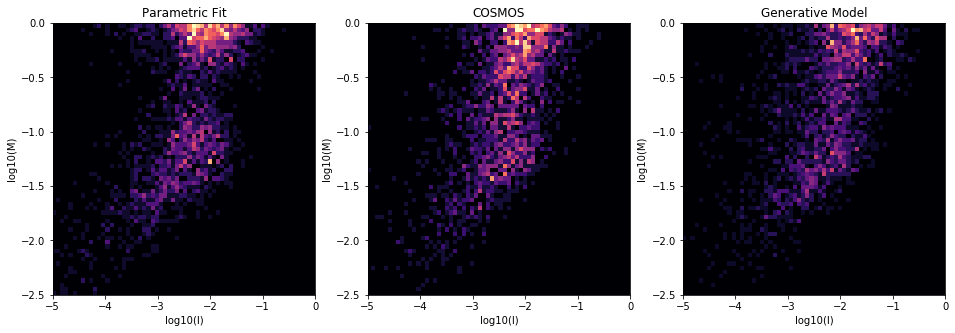

In [25]:
figure(figsize=(16,5))
subplot(131)
m = m_param['flag_morph'] & (m_param['I'] >0) & (m_param['M'] >0)
hist2d(log10(m_param['M'][m]), log10(m_param['I'][m]),64, range=[[-5,0],[-2.5,0]], cmap='magma');
ylabel('log10(M)')
xlabel('log10(I)')
title('Parametric Fit')

subplot(132)
m = m_real['flag_morph'] & (m_real['I'] >0)& (m_real['M'] >0)
hist2d(log10(m_real['M'][m]), log10(m_real['I'][m]),64, range=[[-5,0],[-2.5,0]], cmap='magma');
ylabel('log10(M)')
xlabel('log10(I)')
title('COSMOS')

subplot(133)
m = m_mock['flag_morph'] & (m_mock['I'] >0)& (m_mock['M'] >0)
hist2d(log10(m_mock['M'][m]), log10(m_mock['I'][m]),64, range=[[-5,0],[-2.5,0]], cmap='magma');
ylabel('log10(M)')
xlabel('log10(I)')
title('Generative Model')
savefig("Figures/Figure_MI.pdf")